In [1]:
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
# !pip install autogluon --no-cache-dir
# !pip install bokeh==2.0.1
# !pip install catboost
# !pip install bokeh==2.0.1
from autogluon.tabular import TabularPredictor
import pandas as pd
!pip install kaggle

  Using cached kaggle-1.6.12-py3-none-any.whl


In [2]:
import json
import os

# Load Kaggle API credentials
with open("kaggle.json", "r") as file:
    creds = json.load(file)

# Set environment variables
os.environ['KAGGLE_USERNAME'] = creds['username']
os.environ['KAGGLE_KEY'] = creds['key']


In [3]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip


bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import autogluon

In [5]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
print(train.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [6]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
print(train.describe())

                            datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000 

In [7]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
print(test.head())

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014  


In [8]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
print(submission.head())

              datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0


In [9]:
# # Drop 'casual' and 'registered' columns from the training set
train = train.drop(['casual', 'registered'], axis=1)


In [10]:
print(train.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')


In [11]:
# Define the predictor and fit the model
learner_kwargs={"ignored_columns": ["casual", "registered"]}
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error', learner_kwargs=learner_kwargs).fit(train, hyperparameter_tune_kwargs={"searcher": "bayesopt", "num_trials": 20})
print(predictor.fit_summary())

No path specified. Models will be saved in: "AutogluonModels/ag-20240506_103018"
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240506_103018"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.57 GB / 10.73 GB (33.3%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is depr

*** Summary of fit() ***
Estimated performance of each model:
                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge -133.005984       0.071803  4.932824                0.071803           4.932824            1       True          1
1  WeightedEnsemble_L2 -133.005984       0.072413  4.938401                0.000611           0.005578            2       True          2
Number of models trained: 2
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 3 | ['season', 'weather', 'humidity']
('int', ['bool'])            : 2 | ['holiday', 'workingday']
('int', ['datetime_as_int']) : 5 | ['datetime', 'datetime.year', 'datetime.month', 'datetime.day', 'datetime.dayofw

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [12]:
# Make predictions on the test set
predictions = predictor.predict(test)
print(predictions.head())


0    68.376534
1    56.183132
2    56.183132
3    48.234161
4    48.234161
Name: count, dtype: float32


In [13]:
# KeyError: "2 required columns are missing from the provided dataset to transform using AutoMLPipelineFeatureGenerator. 
# 2 missing columns: ['casual', 'registered'] | 9 available columns: ['datetime', 'season', 'holiday', 'workingday',
# 'weather', 'temp', 'atemp', 'humidity', 'windspeed']"
# As it didn't work, i will drop the two unused coloumns as in line 9

In [14]:
# Describe the `predictions` series to see if there are any negative values
print(predictions.describe())

count    6493.000000
mean      196.728500
std       125.114197
min        -3.578743
25%       101.350777
50%       166.528580
75%       269.329529
max       642.697754
Name: count, dtype: float64


In [15]:
# How many negative values do we have?
print((predictions < 0).sum())

8


In [16]:
# Set them to zero
predictions[predictions < 0] = 0

In [17]:
# Set the predictions to the 'count' column of the submission dataframe
submission["count"] = predictions

# Save the submission dataframe to a CSV file
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 673kB/s]
Successfully submitted to Bike Sharing Demand

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-05-06 10:30:25  first raw submission               complete  1.33653      1.33653       
submission_new_hpo.csv       2024-05-05 17:44:58  new features with hyperparameters  complete  0.536        0.536         
submission_new_features.csv  2024-05-05 17:44:07  new features                       complete  0.536        0.536         
submission_new_features.csv  2024-05-05 17:43:48  new features                       complete  0.536        0.536         


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >, <Axes: >]],
      dtype=object)

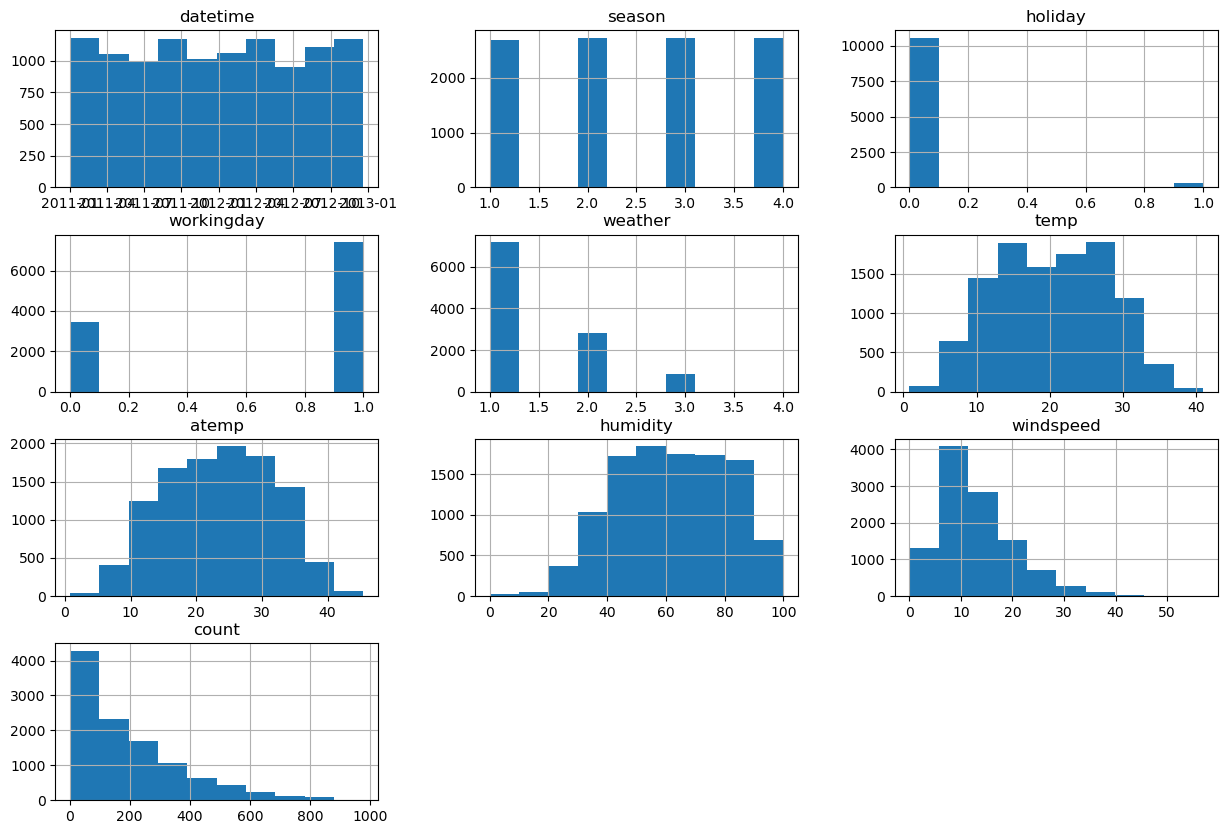

In [20]:
# Create a histogram of all features to show the distribution of each one relative to the data
train.hist(figsize=(15,10))

In [21]:
# Create a new feature, for example, the hour from the datetime
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

In [22]:
# Convert 'season' and 'weather' columns to categorical type
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [23]:
# View the new feature
print(train.head())

             datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  hour  
0        81        0.0     16     0  
1        80        0.0     40     1  
2        80        0.0     32     2  
3        75        0.0     13     3  
4        75        0.0      1     4  


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>]], dtype=object)

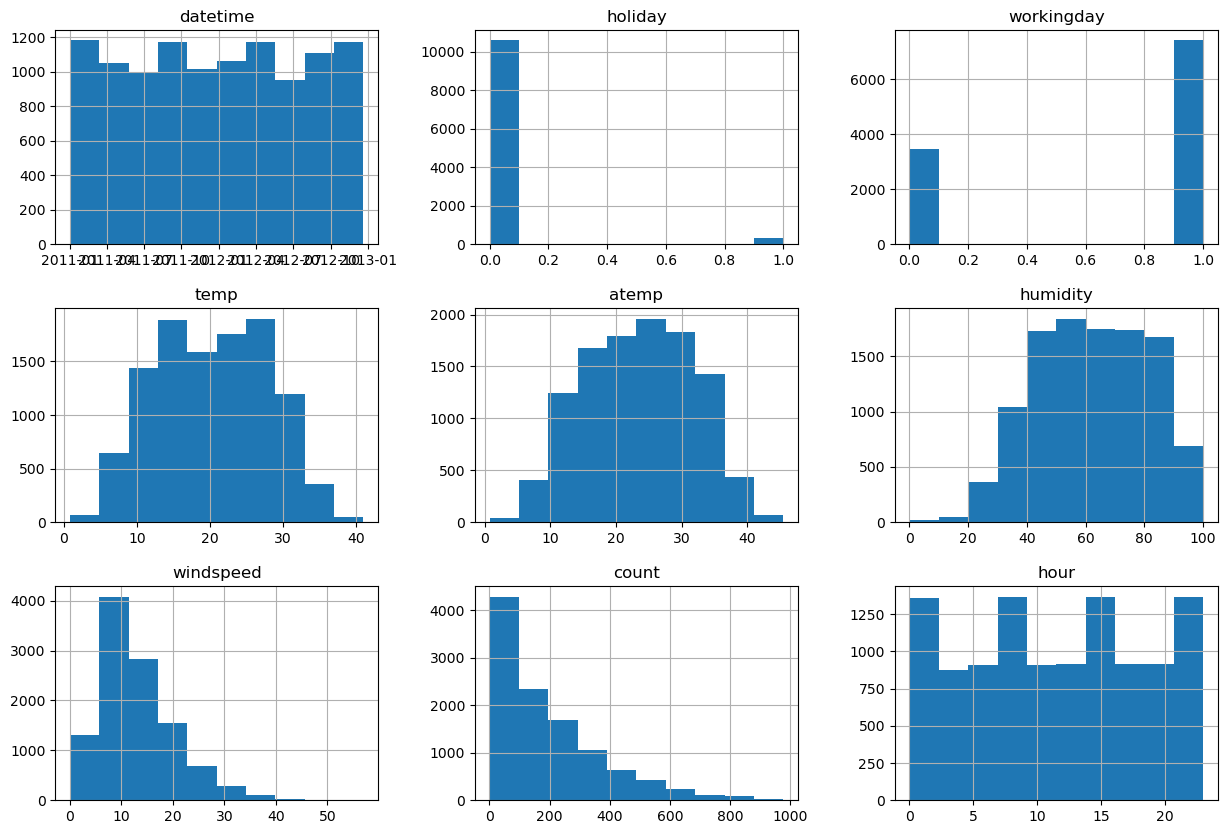

In [24]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,10))

In [25]:
# Define the predictor and fit the model with the new feature
learner_kwargs={"ignored_columns": ["casual", "registered"]}
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error', learner_kwargs=learner_kwargs).fit(train, hyperparameter_tune_kwargs={"searcher": "bayesopt", "num_trials": 20})

No path specified. Models will be saved in: "AutogluonModels/ag-20240506_103032"
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240506_103032"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.56 GB / 10.73 GB (33.2%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is dep

[1000]	valid_set's rmse: 35.2436


	-35.1917	 = Validation score   (-root_mean_squared_error)
	3.67s	 = Training   runtime
	0.36s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-35.1917	 = Validation score   (-root_mean_squared_error)
	0.0s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 4.94s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240506_103032")


In [26]:
# Print the summary of the new model
print(predictor_new_features.fit_summary())

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge -35.191676       0.363567  3.667878                0.363567           3.667878            1       True          1
1  WeightedEnsemble_L2 -35.191676       0.363986  3.671035                0.000420           0.003157            2       True          2
Number of models trained: 2
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 2 | ['humidity', 'hour']
('int', ['bool'])            : 2 | ['holiday', 'workingday']
('int', ['datetime_as_int']) : 5 | ['datetime', 'datetime.year', 'datetime

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [27]:
# Make predictions with the new feature and set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features[predictions_new_features < 0] = 0

In [28]:
# Set the new predictions to the 'count' column of the submission dataframe
submission["count"] = predictions_new_features

In [29]:
# Save the new submission dataframe to a CSV file
submission.to_csv("submission_new_features.csv", index=False)

In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 636kB/s]
Successfully submitted to Bike Sharing Demand

In [31]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-06 10:30:39  new features                       complete  0.536        0.536         
submission.csv               2024-05-06 10:30:25  first raw submission               complete  1.33653      1.33653       
submission_new_hpo.csv       2024-05-05 17:44:58  new features with hyperparameters  complete  0.536        0.536         
submission_new_features.csv  2024-05-05 17:44:07  new features                       complete  0.536        0.536         


In [32]:
# Define the predictor with new hyperparameters and fit the model with the new feature
hyperparameters = {
    'GBM': [{'num_boost_round': 100, 'learning_rate': 0.1}, 'GBMLarge'],
    'CAT': {'iterations': 100, 'learning_rate': 0.1},
    'XGB': {'n_estimators': 100, 'learning_rate': 0.1},
}
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train, hyperparameters=hyperparameters, hyperparameter_tune_kwargs={"searcher": "bayesopt", "num_trials": 20})


No path specified. Models will be saved in: "AutogluonModels/ag-20240506_103041"
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240506_103041"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.55 GB / 10.73 GB (33.1%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/utils.py:564: FutureWarning: use_inf_as_na option is dep

[1000]	valid_set's rmse: 35.2436


	-35.1917	 = Validation score   (-root_mean_squared_error)
	3.77s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-35.1917	 = Validation score   (-root_mean_squared_error)
	0.0s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 5.27s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240506_103041")


In [33]:
# Print the summary of the new model with hyperparameters
print(predictor_new_hpo.fit_summary())

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge -35.191676       0.427220  3.767560                0.427220           3.767560            1       True          1
1  WeightedEnsemble_L2 -35.191676       0.427671  3.770962                0.000451           0.003402            2       True          2
Number of models trained: 2
Types of models trained:
{'LGBModel', 'WeightedEnsembleModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 2 | ['humidity', 'hour']
('int', ['bool'])            : 2 | ['holiday', 'workingday']
('int', ['datetime_as_int']) : 5 | ['datetime', 'datetime.year', 'datetime

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [34]:
# Make predictions with the new feature and hyperparameters and set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [35]:
# Set the new predictions to the 'count' column of the submission dataframe
submission["count"] = predictions_new_hpo

# Save the new submission dataframe to a CSV file
submission.to_csv("submission_new_hpo.csv", index=False)


In [40]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 696kB/s]
Successfully submitted to Bike Sharing Demand

In [41]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-06 10:32:51  new features with hyperparameters  pending                              
submission_new_hpo.csv       2024-05-06 10:30:48  new features with hyperparameters  complete  0.536        0.536         
submission_new_features.csv  2024-05-06 10:30:39  new features                       complete  0.536        0.536         
submission.csv               2024-05-06 10:30:25  first raw submission               complete  1.33653      1.33653       


In [55]:
print(leaderboard.columns)
print(leaderboard['model'])

Index(['model', 'score_val', 'pred_time_val', 'fit_time',
       'pred_time_val_marginal', 'fit_time_marginal', 'stack_level',
       'can_infer', 'fit_order'],
      dtype='object')
0          LightGBMLarge
1    WeightedEnsemble_L2
Name: model, dtype: object


                 model   score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge -133.005984       0.071803  4.932824                0.071803           4.932824            1       True          1
1  WeightedEnsemble_L2 -133.005984       0.072413  4.938401                0.000611           0.005578            2       True          2
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge -35.191676       0.363567  3.667878                0.363567           3.667878            1       True          1
1  WeightedEnsemble_L2 -35.191676       0.363986  3.671035                0.000420           0.003157            2       True          2
                 model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge -35.191676     

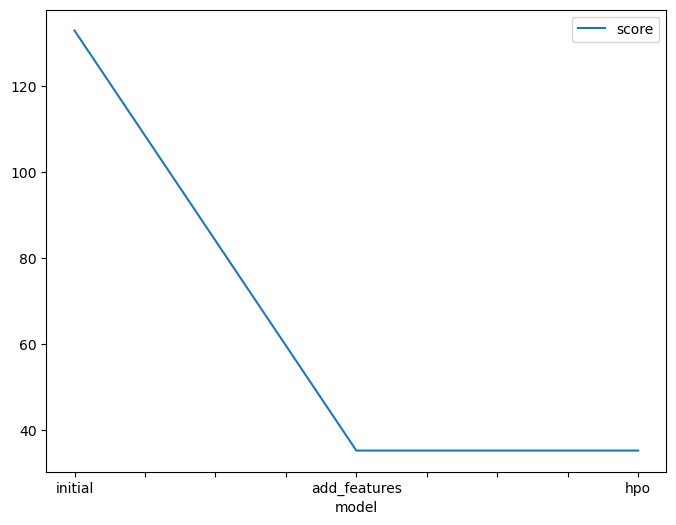

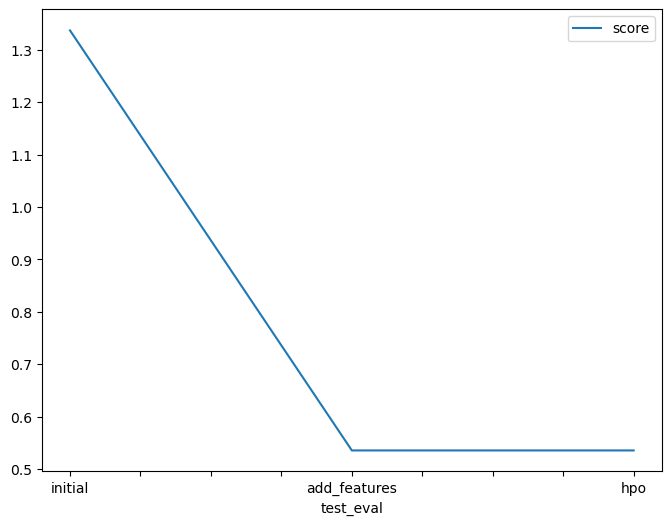

In [60]:

# Assume that 'predictor' is your trained TabularPredictor
leaderboard = predictor.leaderboard()
leaderboard_nf = predictor_new_features.leaderboard()
leaderboard_hpo = predictor_new_hpo.leaderboard()


# Get the best (minimum) score for each model
initial_score = abs(leaderboard[leaderboard['model'] == 'WeightedEnsemble_L2']['score_val'].min())
new_features_score = abs(leaderboard_nf[leaderboard['model'] == 'WeightedEnsemble_L2']['score_val'].min())
new_hpo_score = abs(leaderboard_hpo[leaderboard['model'] == 'WeightedEnsemble_L2']['score_val'].min())

# Create a line plot to show improvement of the model score
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [initial_score, new_features_score, new_hpo_score]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

# Kaggle scores
initial_kaggle_score = 1.33653  
new_features_kaggle_score = 0.53600
new_hpo_kaggle_score = 0.53600

# Create a line plot to show improvement of the Kaggle score
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [initial_kaggle_score, new_features_kaggle_score, new_hpo_kaggle_score]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')


In [61]:
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "GBM:'num_boost_round': 100, 'learning_rate': 0.1}, 'GBMLarge' "],
    "hpo2": ["default", "default",  "CAT: 'iterations': 100, 'learning_rate': 0.1"],
    "hpo3": ["default", "default", "XGB: 'n_estimators': 100, 'learning_rate': 0.1"],
    "score": [1.33653, 0.536 , 0.536 ]  # your actual Kaggle scores
})


,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.33653
1,add_features,default,default,default,0.53600
2,hpo,"GBM:'num_boost_round': 100, 'learning_rate': 0...","CAT: 'iterations': 100, 'learning_rate': 0.1","XGB: 'n_estimators': 100, 'learning_rate': 0.1",0.53600


In [62]:
!jupyter nbconvert --to html project_notebook.ipynb

[NbConvertApp] Converting notebook project_notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 629932 bytes to project_notebook.html
